In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad

##To start, I think we just want to use a random crossection for the system, and just try to do a monte carlo 
##of if a random neutron can escape or not

#Example montecarlo loop
def MC_ND_Sphere(M,N,R):
    Nreps = 100
    #empty Volume array
    V    = np.zeros((Nreps)) 
    
    #MonteCarlo Loop
    for i in range(Nreps):
        #empty position and radius arrays
        D = np.ones((N,M))
        Rad = np.zeros(M)
        for p in range(N):
            #populate positions & Calculate radii
            D[p] = np.random.uniform(0,R,(1,M))
            Rad = Rad + D[p]**2
        #Calculate volume
        V[i] = (R**N)*(2**N)*(Rad<(R**2)).sum()/M
    
        
    RealVal = ((np.pi**(N/2))/(math.gamma(N/2 + 1)))*(R**N)
    SimulatedVolume = np.mean(V)
    StandardDeviation = np.std(V)

    return SimulatedVolume,StandardDeviation , RealVal

In [2]:
#I also think we should prioritize getting one particle modeled then switch to monte carlo

#at 1 MeV neutrons
Sf = 10.3 #mb fission
Si = 1300 #mb inelastic
Se = 4000 #mb elastic 

#also a note, for the total crossection, it is just the sum of the fission, absorbtion and scattering crossections
Stot = Sf+Si+Se

N = 19.05 #g/cm3 
#for a particle density of "n" and a cross section of "s"
#the free path pdf is given by: 1/ns * e^-x/ns

def PDF(x):
    return (1/)

#integrate the pdf to get a cdf that goes from 0<y<1

#from there we pick a random number from 0< <1, and then we can use that as the y value for the cdf,
#which then can tell us the distance the particle will travel


#we also need to make a neutron with a random direction, velocity

#we can then compare to see if the distance in the direction of the neutron is travelling to the edge of our
#sphere reactor is greater than or less than the interaction distance we just calculated

#this essentially tells us if our neutron escaped or not, and from here we can do a similar simulation to see 
#what that neutron does (does it get absorbed does it fission or does it scatter)

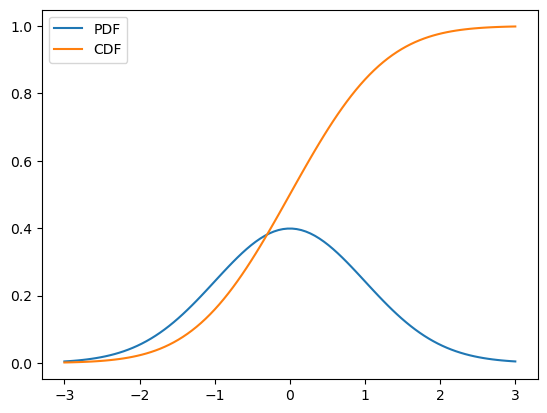

In [4]:
import numpy as np

import matplotlib.pyplot as plt

# Define a PDF function (example: Gaussian)
def pdf(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# Calculate the CDF using numerical integration
def cdf(x):
    return quad(pdf, -np.inf, x)[0]

# Generate x values for plotting
x_vals = np.linspace(-3, 3, 100)

# Calculate corresponding PDF and CDF values
pdf_vals = [pdf(x) for x in x_vals]
cdf_vals = [cdf(x) for x in x_vals]

# Plot the PDF and CDF
plt.plot(x_vals, pdf_vals, label='PDF')
plt.plot(x_vals, cdf_vals, label='CDF')
plt.legend()
plt.show()